### Analysis to see how many of the genes in my list were in the top 5% of total genes

In [1]:
# settings and modules
%config InlineBackend.figure_format = 'retina'
%pylab inline
from nsaba.nsaba import nsaba
from nsaba.nsaba import analysis

Populating the interactive namespace from numpy and matplotlib


In [2]:
ns_path = "/Users/Torben/Documents/ABI analysis/current_data_new/"
aba_path = '/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/'
#nsaba.Nsaba.aba_load(aba_path)
nsaba.Nsaba.ns_load(ns_path)
nsaba.Nsaba.aba_load(aba_path)
N = nsaba.Nsaba()
N.load_ge_pickle(pkl_file='/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/Nsaba_ABA_ge.pkl')

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.

This may take a minute or two ...
Initializing gene data from normalized_microarray_donor9861
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
'ge' dictionary successfully loaded


In [9]:
N.get_ns_act('depression', thresh=-1, method='knn',smoothing='not',estimation_method = 'sum',search_radii=2)
N.get_ns_act('dopamine', thresh=-1, method='knn',smoothing='not',estimation_method = 'sum',search_radii=2)
N.get_ns_act('reward', thresh=-1, method='knn',smoothing='not',estimation_method = 'sum',search_radii=2)
N.get_ns_act('serotonin', thresh=-1, method='knn',smoothing='not',estimation_method = 'sum',search_radii=2)
N.get_ns_act('anxiety', thresh=-1, method='knn',smoothing='not',estimation_method = 'sum',search_radii=2)
N.get_ns_act('schizophrenia', thresh=-1, method='knn',smoothing='not',estimation_method = 'sum',search_radii=2)

This may take a few minutes...
This may take a few minutes...
This may take a few minutes...
This may take a few minutes...
This may take a few minutes...
This may take a few minutes...


In [4]:
depression_genes = analysis.load_gene_list('/Users/Torben/Documents/ABI analysis/gene_collections/','DepressionGenes.csv')
dopamine_genes = analysis.load_gene_list('/Users/Torben/Documents/ABI analysis/gene_collections/','DopamineGenes2.csv')
reward_genes = analysis.load_gene_list('/Users/Torben/Documents/ABI analysis/gene_collections/','rewardGenes2.csv')
serotonin_genes = analysis.load_gene_list('/Users/Torben/Documents/ABI analysis/gene_collections/','SerotoninGenes.csv')
anxiety_genes = analysis.load_gene_list('/Users/Torben/Documents/ABI analysis/gene_collections/','AnxietyGenes.csv')
schizophrenia_genes = analysis.load_gene_list('/Users/Torben/Documents/ABI analysis/gene_collections/','SchizophreniaGenes.csv')

In [10]:
alpha_output = np.zeros((6,4))
A = analysis.NsabaAnalysis(N)
methods = ['pearson','spearman','regression','t_test']
for m in xrange(len(methods)):
    depression_alpha = A.validate_by_alpha('depression',depression_genes,method=methods[m],nih_only=True,gi_csv_path='/Users/Torben/Code/nsaba/')
    dopamine_alpha = A.validate_by_alpha('dopamine',dopamine_genes,method=methods[m],nih_only=True,gi_csv_path='/Users/Torben/Code/nsaba/')
    reward_alpha = A.validate_by_alpha('reward',reward_genes,method=methods[m],nih_only=True,gi_csv_path='/Users/Torben/Code/nsaba/')
    serotonin_alpha = A.validate_by_alpha('serotonin',serotonin_genes,method=methods[m],nih_only=True,gi_csv_path='/Users/Torben/Code/nsaba/')
    anxiety_alpha = A.validate_by_alpha('anxiety',anxiety_genes,method=methods[m],nih_only=True,gi_csv_path='/Users/Torben/Code/nsaba/')
    schizophrenia_alpha = A.validate_by_alpha('schizophrenia',schizophrenia_genes,method=methods[m],nih_only=True,gi_csv_path='/Users/Torben/Code/nsaba/')
    
    alpha_output[0,m] = len(depression_alpha)/float(len(depression_genes))
    alpha_output[1,m] = len(dopamine_alpha)/float(len(dopamine_genes))
    alpha_output[2,m] = len(reward_alpha)/float(len(reward_genes))
    alpha_output[3,m] = len(serotonin_alpha)/float(len(serotonin_genes))
    alpha_output[4,m] = len(anxiety_alpha)/float(len(anxiety_genes))
    alpha_output[5,m] = len(schizophrenia_alpha)/float(len(schizophrenia_genes))

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled
Using NIH described genes only; Entrez ID sample size now 18896
pearson's r must be > 0.043152524422
Using NIH described genes only; Entrez ID sample size now 18896
pearson's r must be > 0.0415508129963
Using NIH described genes only; Entrez ID sample size now 18896
pearson's r must be > 0.0393162119279
Using NIH described genes only; Entrez ID sample size now 18896
pearson's r must be > 0.0607031092656
Using NIH described genes only; Entrez ID sample size now 18896
pearson's r must be > 0.0631139737664
Using NIH described genes only; Entrez ID sample size now 18896
pearson's r must be > 0.0387556772115
Using NIH described genes only; Entrez ID sample size now 18896
spearman's r must be > 0.081439851449
Using NIH described genes only; Entrez ID sample size now 18896
spearman's r must be > 0.129343949876
Using NIH described genes only; Entrez ID sample size now 18896
spearman's r must be > 0.0713027518

In [6]:
#print m
print alpha_output
#N.get_ns_act('dopamine', thresh=-1, method='knn',smoothing='gaussian',estimation_method = 'mean')
#A = analysis.NsabaAnalysis(N)
#dopamine_alpha = A.validate_by_alpha('dopamine',dopamine_genes)
#print dopamine_alpha

[[ 0.          0.          0.          0.        ]
 [ 0.29411765  0.23529412  0.          0.11764706]
 [ 0.23529412  0.23529412  0.11764706  0.29411765]
 [ 0.03571429  0.03571429  0.          0.        ]
 [ 0.2         0.1         0.          0.        ]
 [ 0.42857143  0.          0.          0.        ]]


In [42]:
ttest_metrics = A.t_test_multi('schizophrenia', quant = 85,nih_only=True,gi_csv_path='/Users/Torben/code/nsaba/')
t= A.fetch_gene_descriptions(ttest_metrics,gene_path='/Users/Torben/Code/nsaba/')

This may take a couple of minutes ...
Using NIH described genes only; Entrez ID sample size now 18896
Fetching NIH gene descriptions ...
gene_rec(entrez=100008589, cohen_d=-1.0883645912209226, p_value=1.2140863134363576e-12)
gene_rec(entrez=7280, cohen_d=-0.52464441507775128, p_value=1.622317197247864e-06)
gene_rec(entrez=2823, cohen_d=-0.44722597862836105, p_value=3.8693990165040951e-06)
gene_rec(entrez=353134, cohen_d=-0.43103146297937156, p_value=0.00035957270346876258)
gene_rec(entrez=84570, cohen_d=-0.41771269151276019, p_value=6.5695551962134314e-06)
gene_rec(entrez=100288366, cohen_d=-0.41133572984765954, p_value=0.00012498684945289303)
gene_rec(entrez=7223, cohen_d=-0.38100492683679849, p_value=3.8592120486950921e-05)
gene_rec(entrez=131034, cohen_d=-0.37146849580480173, p_value=5.9641043805490689e-05)
gene_rec(entrez=341350, cohen_d=-0.36881155546893668, p_value=6.7522271437266512e-05)
gene_rec(entrez=57496, cohen_d=-0.36293089795136774, p_value=0.00011851851992019055)
gene_re

In [11]:
import csv

with open('/Users/Torben/Documents/ABI analysis/validation/flat_sum_r2_alpha_validation.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile)
    for a in alpha_output:
        spamwriter.writerow(a)

In [12]:
terms = ['depression','dopamine','reward','anxiety','schizophrenia']

for term in terms:
    ttest_metrics = A.t_test_multi(term, quant = 85,nih_only=True,gi_csv_path='/Users/Torben/code/nsaba/')
    t= A.fetch_gene_descriptions(ttest_metrics,gene_path='/Users/Torben/Code/nsaba/')
    with open('/Users/Torben/Documents/ABI analysis/validation/top'+term+'_genes_t85_flat2.csv', 'wb') as csvfile:
        spamwriter = csv.writer(csvfile)
        for ti in t:
            spamwriter.writerow(ti)

This may take a couple of minutes ...
Using NIH described genes only; Entrez ID sample size now 18896
Fetching NIH gene descriptions ...
gene_rec(entrez=100008589, cohen_d=-1.3178099869523801, p_value=4.4852860690082376e-15)
gene_rec(entrez=25854, cohen_d=-0.65583901967178615, p_value=3.2826465229165229e-09)
gene_rec(entrez=55512, cohen_d=-0.64662698410639841, p_value=5.3381146978178766e-09)
gene_rec(entrez=285220, cohen_d=-0.63659345672565937, p_value=9.0693457569323296e-09)
gene_rec(entrez=644150, cohen_d=-0.63540726161446404, p_value=9.6991450277588558e-09)
gene_rec(entrez=254263, cohen_d=-0.63466768060339052, p_value=1.0024299633344645e-08)
gene_rec(entrez=5582, cohen_d=-0.62267402074389644, p_value=1.8586156546395949e-08)
gene_rec(entrez=100133686, cohen_d=-0.6205910647723103, p_value=2.0765417935814287e-08)
gene_rec(entrez=54072, cohen_d=-0.59078415076952651, p_value=9.3391340461906834e-08)
gene_rec(entrez=3208, cohen_d=-0.58835036847640509, p_value=1.0405278407392498e-07)
gene_r

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([ 3.,  0.,  3.,  0.,  2.,  2.,  1.,  0.,  1.,  1.]),
 array([-0.05428171, -0.04125796, -0.02823422, -0.01521047, -0.00218672,
         0.01083703,  0.02386077,  0.03688452,  0.04990827,  0.06293202,
         0.07595576]),
 <a list of 10 Patch objects>)

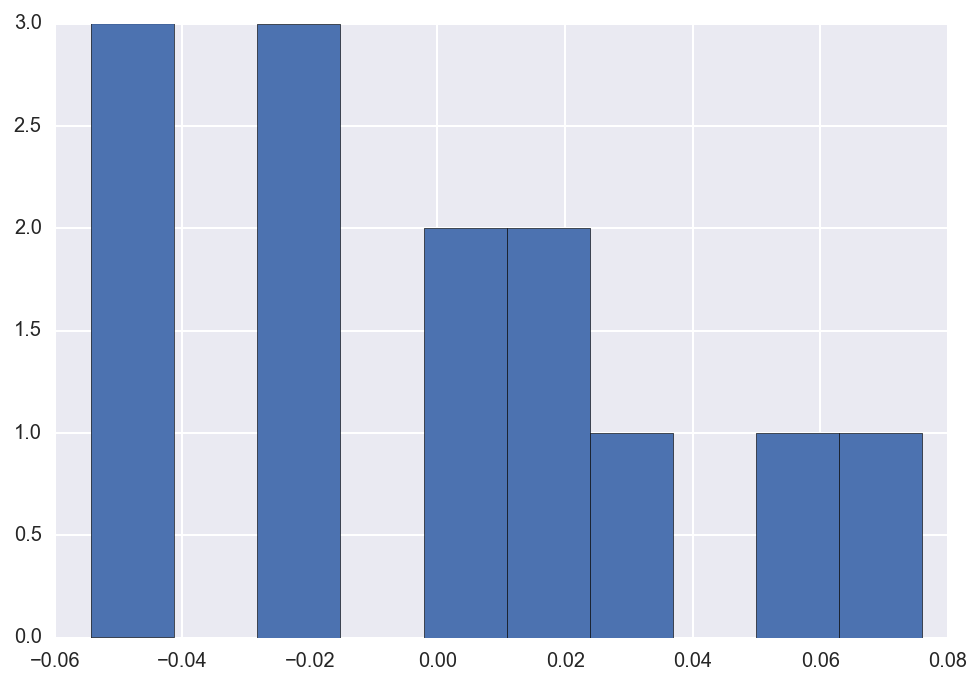

In [19]:
import scipy.stats as stats
r_vals = []
for gene in depression_genes:
    ge_mat = N.make_ge_ns_mat('depression',[gene])
    #r_vals.append(stats.spearmanr(ge_mat[:, 0], ge_mat[:, 1])[0])
    r_vals.append(np.corrcoef(ge_mat[:, ge_mat.shape[1]-1], ge_mat[:, r])[1, 0])
hist(r_vals)

t-value: -6.5180 
p-value: 5.245E-10
Effect size: -0.9478 



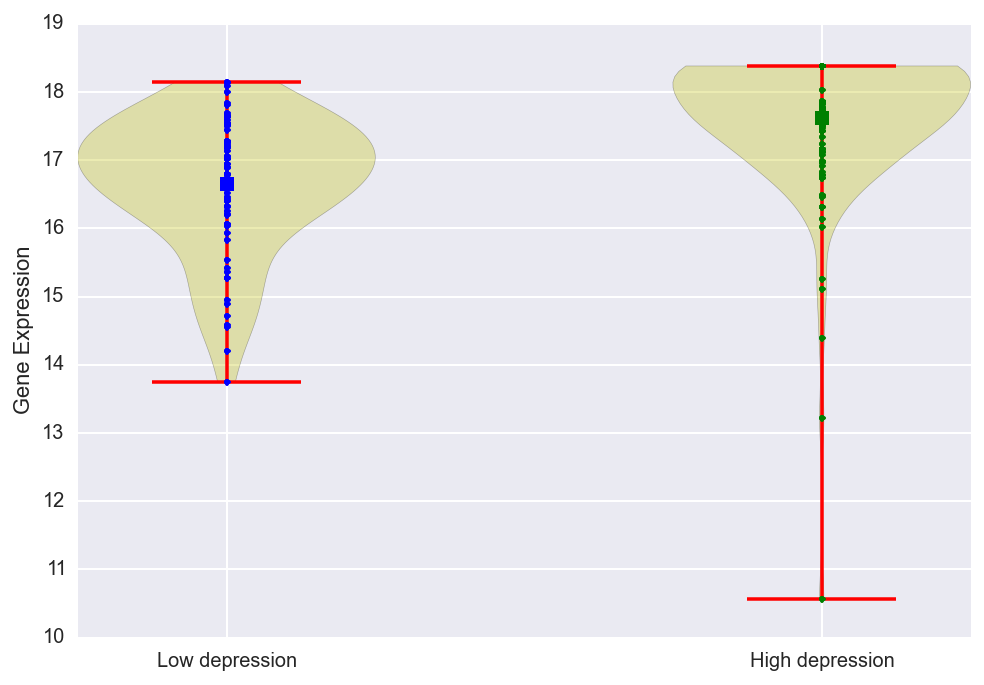

In [44]:
from nsaba.nsaba import visualizer
V = visualizer.NsabaVisualizer(N)

A.t_test('depression',100008589,graphops='violin')